In [2]:
#import the necessary libraries
%matplotlib notebook
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Lissajous figures

<IPython.core.display.Javascript object>


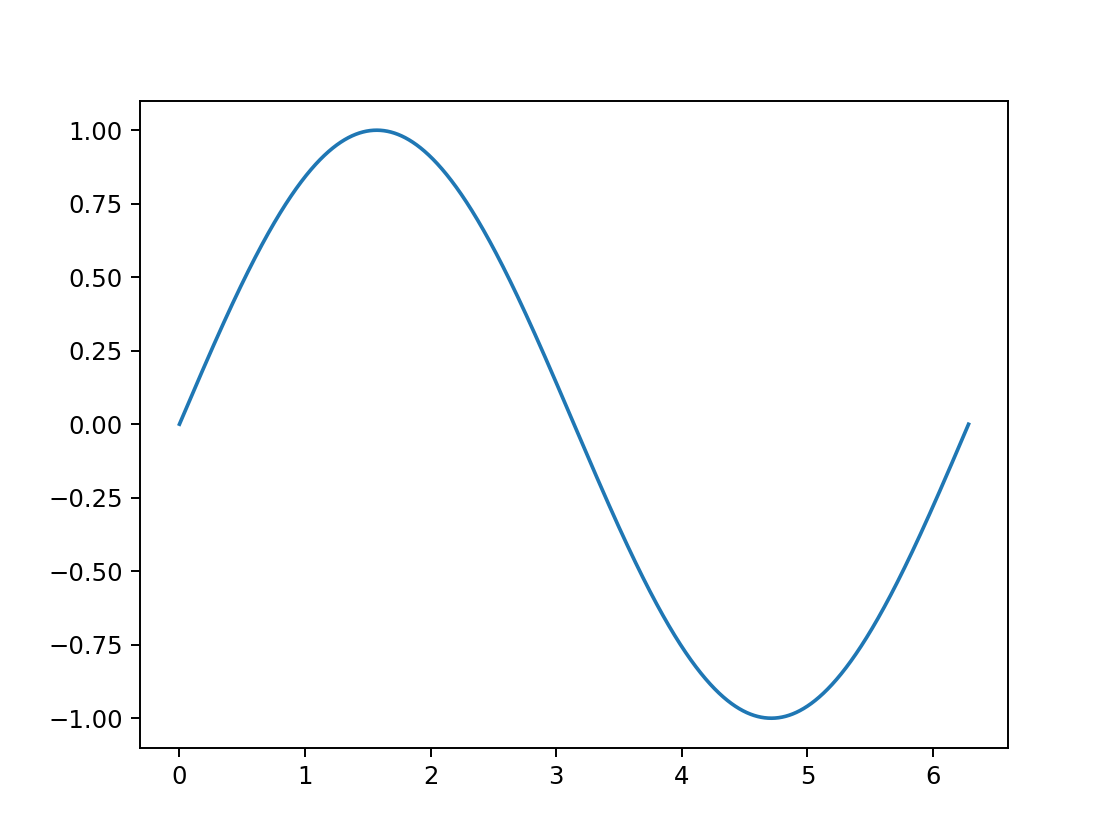

<IPython.core.display.Javascript object>


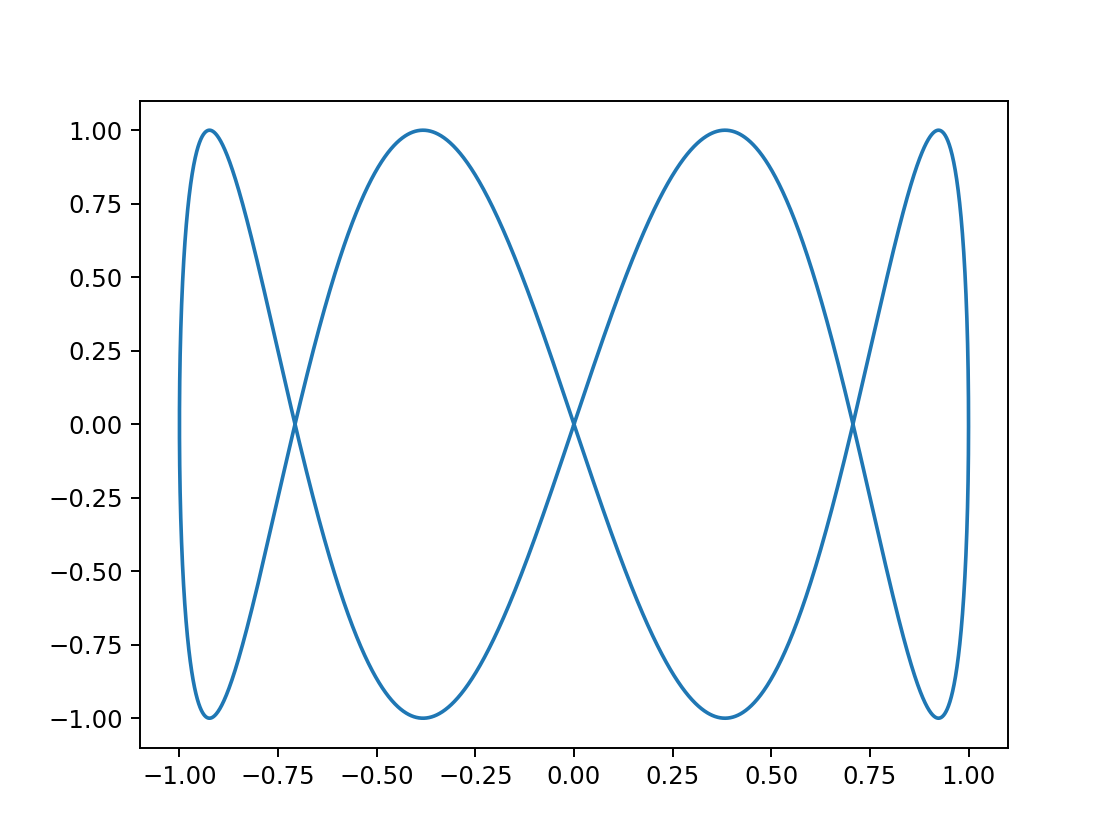

<IPython.core.display.Javascript object>


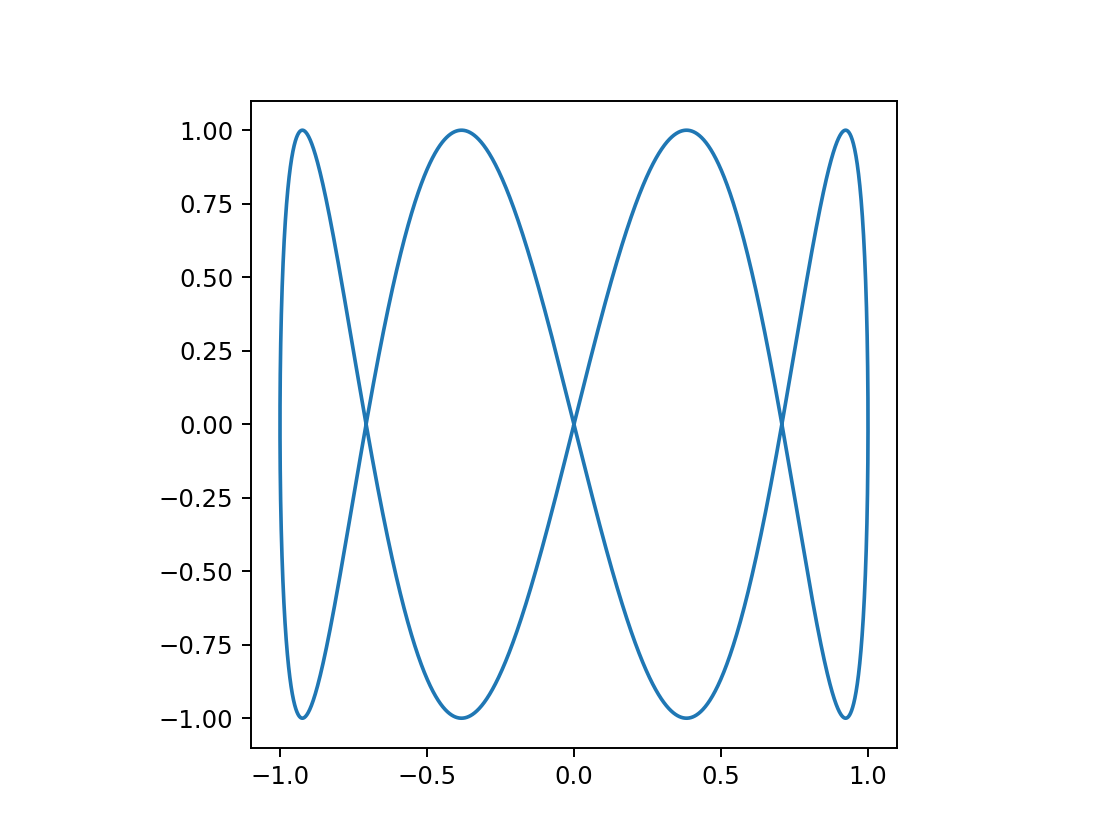

In [3]:
t=np.arange(0,2*np.pi, 0.001)


X = np.sin(t)
Y = np.sin(4*(t+np.pi/2))

plt.figure()
plt.plot(t,X)

plt.figure()
plt.plot(X,Y)

f, ax = plt.subplots()
ax.set_box_aspect(1)
ax.plot(X, Y)

<IPython.core.display.Javascript object>


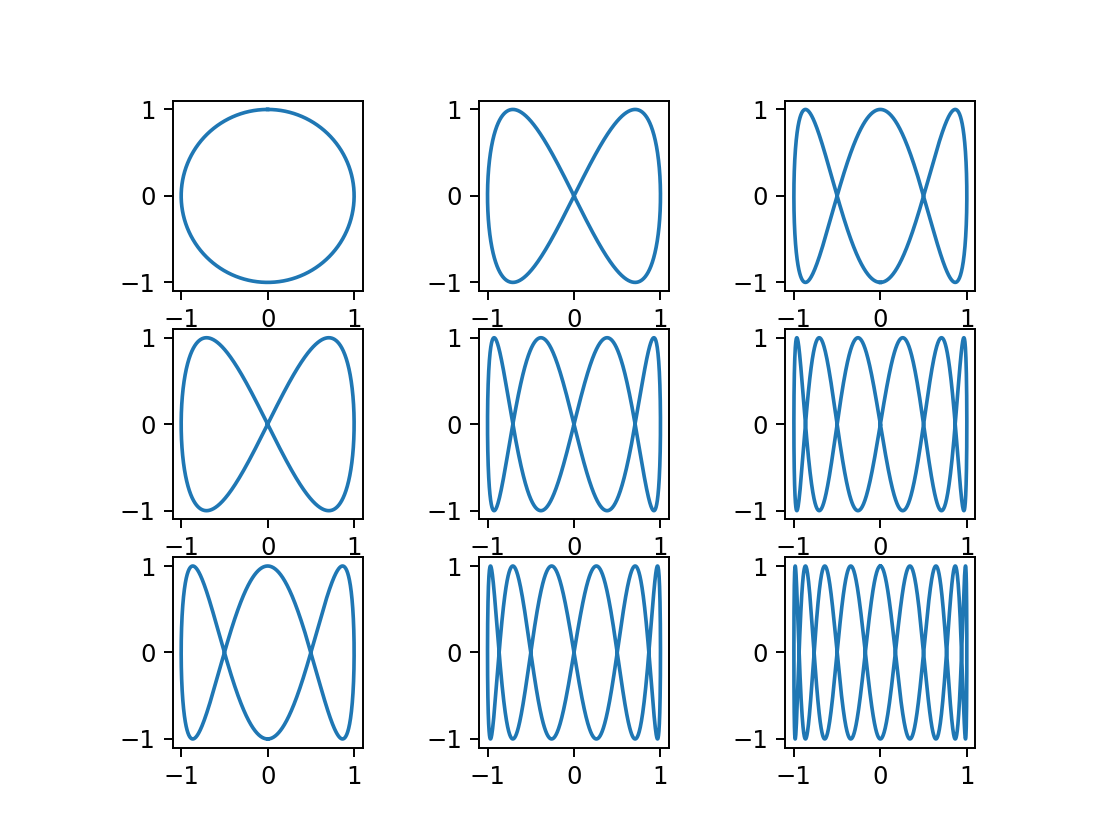

In [4]:
f, ax = plt.subplots(3,3)

X = np.sin(t)
for n in range(0,3):
    for m in range(0,3): 
        Y = np.sin(((n+1)*(m+1))*(t+np.pi/2))
        ax[n,m].set_box_aspect(1)
        ax[n,m].plot(X,Y)

## Transfer function of a low pass filter

<IPython.core.display.Javascript object>


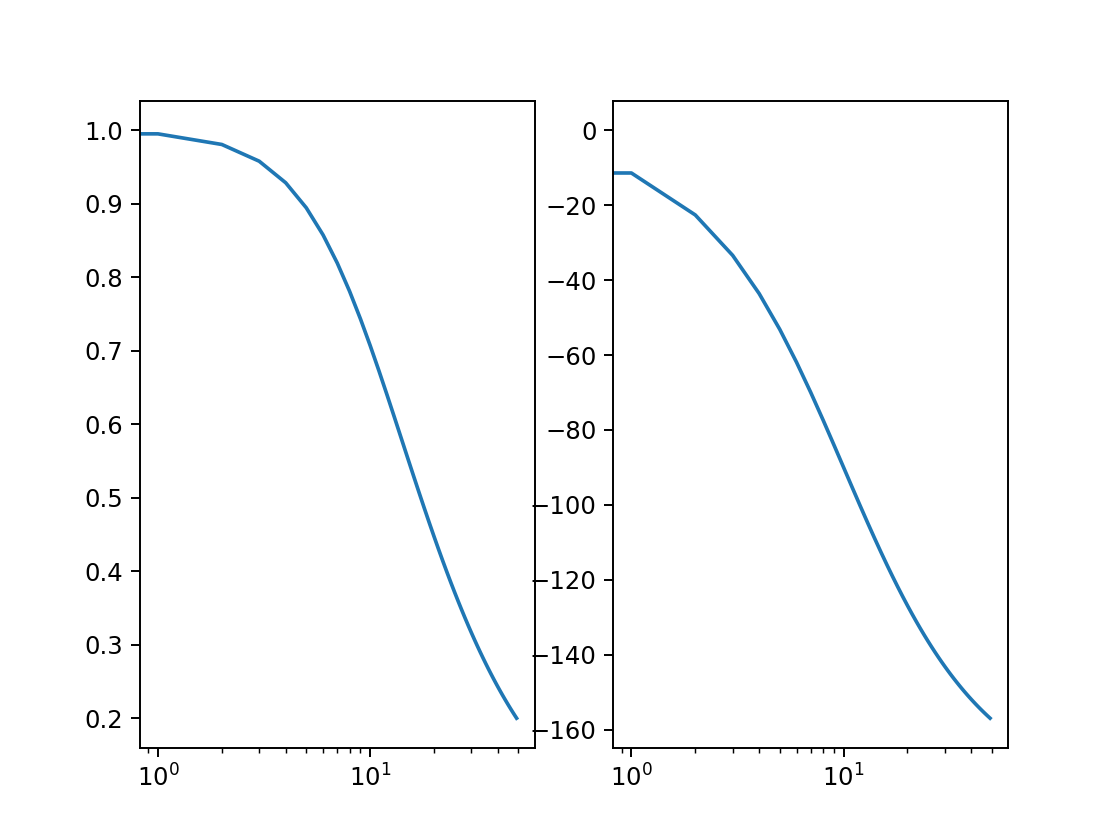

In [5]:
#cutoff frequency
f_c=10

#frequency range
f=np.arange(0,50)

#amplitud responce 
fig1, ax = plt.subplots(1,2)
amplitude = 1/np.sqrt(1+(f/f_c)**2)
ax[0].semilogx(f, amplitude)

#frequency responce
phase = (-2*np.arctan(f/f_c))*180/np.pi
ax[1].semilogx(f, phase)


<IPython.core.display.Javascript object>


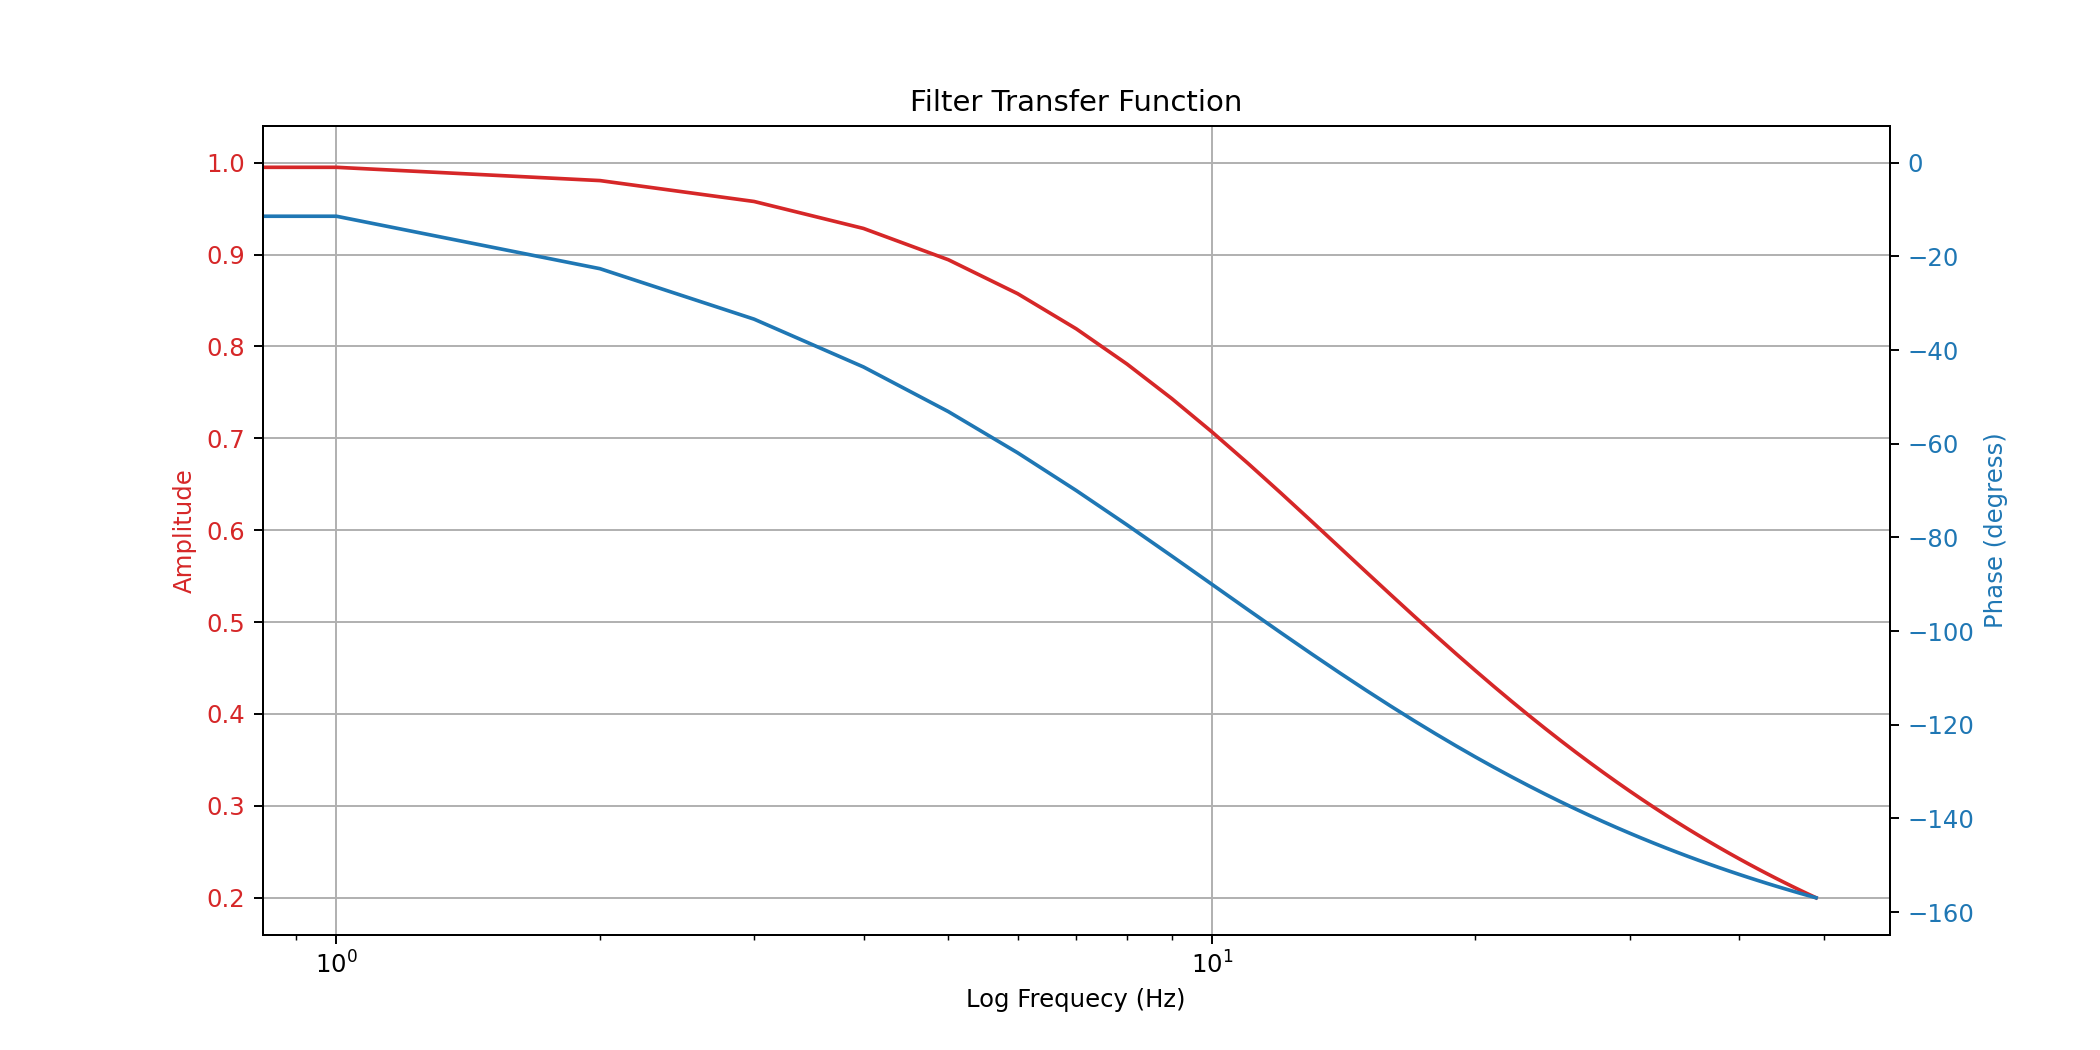

In [6]:
#both plot in single area
#plt.figure()
fig2, ax1 = plt.subplots(figsize = (12, 6))

color = 'tab:red'
ax1.set_title('Filter Transfer Function')
ax1.grid(True)
ax1.set_xlabel('Log Frequecy (Hz)')
ax1.set_ylabel('Amplitude', color=color)
ax1.semilogx(f, amplitude, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Phase (degress)', color=color)  # we already handled the x-label with ax1
ax2.semilogx(f, phase, color=color)
ax2.tick_params(axis='y', labelcolor=color)

## Random walk

<IPython.core.display.Javascript object>


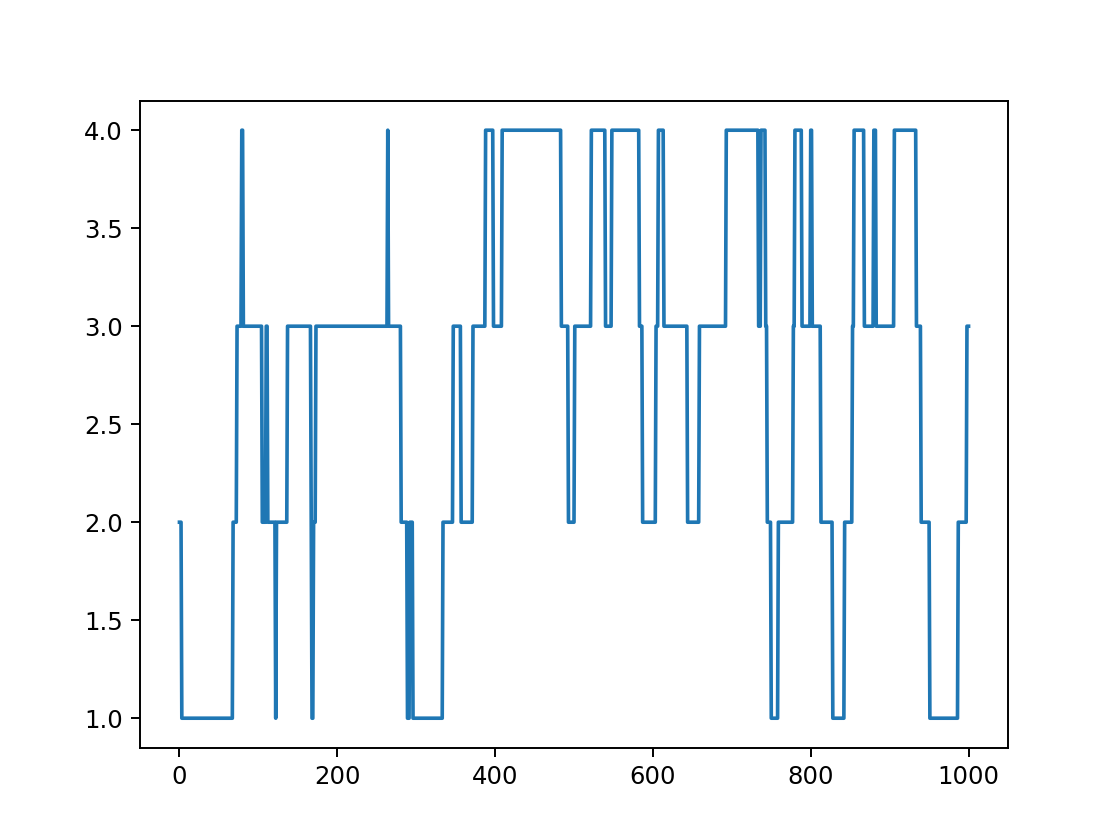

In [14]:
#from: https://www.geeksforgeeks.org/random-walk-implementation-python/

import random

# Probability to move up or down
prob = [0.05, 0.95] 
 
# statically defining the starting position
start = 2 
positions = [start]
 
# creating the random points
rr = np.random.random(1000)
downp = rr < prob[0]
upp = rr > prob[1]
 
 
for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up)
 
# plotting down the graph of the random walk in 1D
plt.figure()
plt.plot(positions)


In [8]:
#moving average filtering 
#from: https://saturncloud.io/blog/how-to-filter-and-smooth-data-with-scipy-and-numpy/

def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, window, mode='same')
    return smoothed_data

<IPython.core.display.Javascript object>


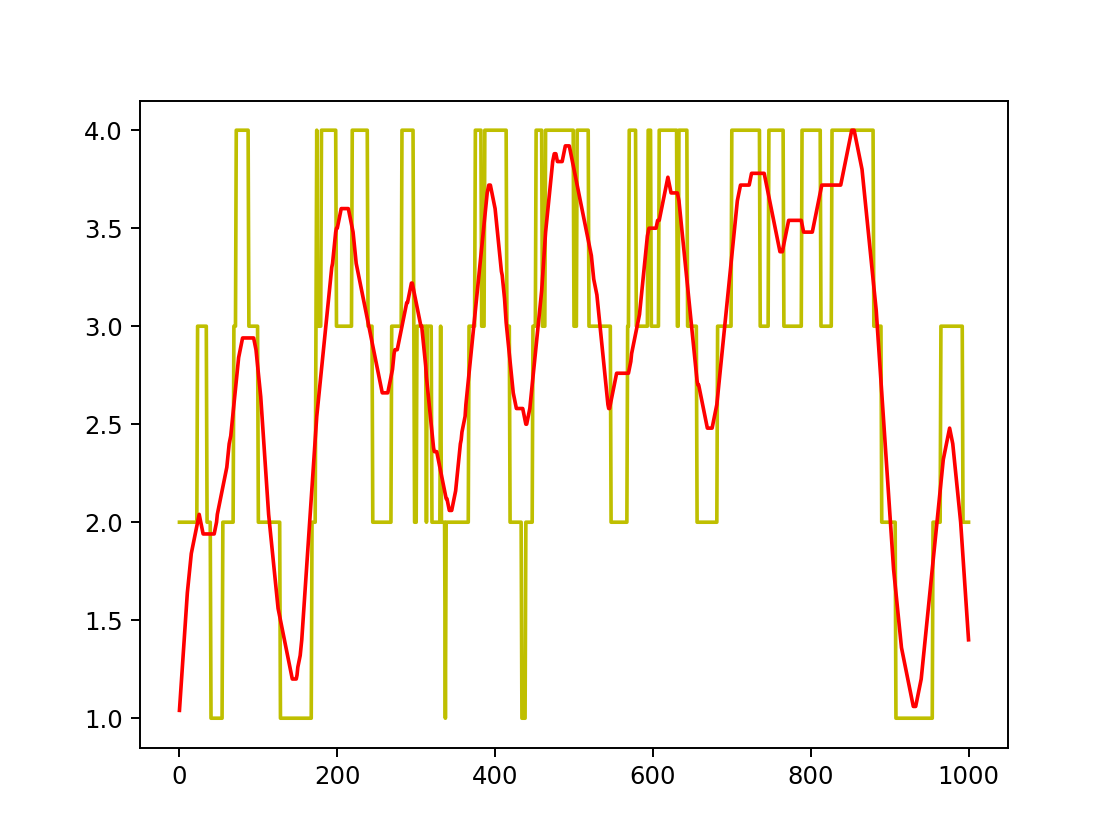

In [9]:
pos_smooth = moving_average(positions, 50)

plt.figure()
plt.plot(positions, 'y')
plt.plot(pos_smooth, 'r')


In [10]:
#print variance

print('Variace of original data: ' + str(np.var(positions)))
print('Variace of filtered data: ' + str(np.var(pos_smooth)))

Variace of original data: 1.0151247354044557
Variace of filtered data: 0.5749041663631075


## Matrix Images


<IPython.core.display.Javascript object>


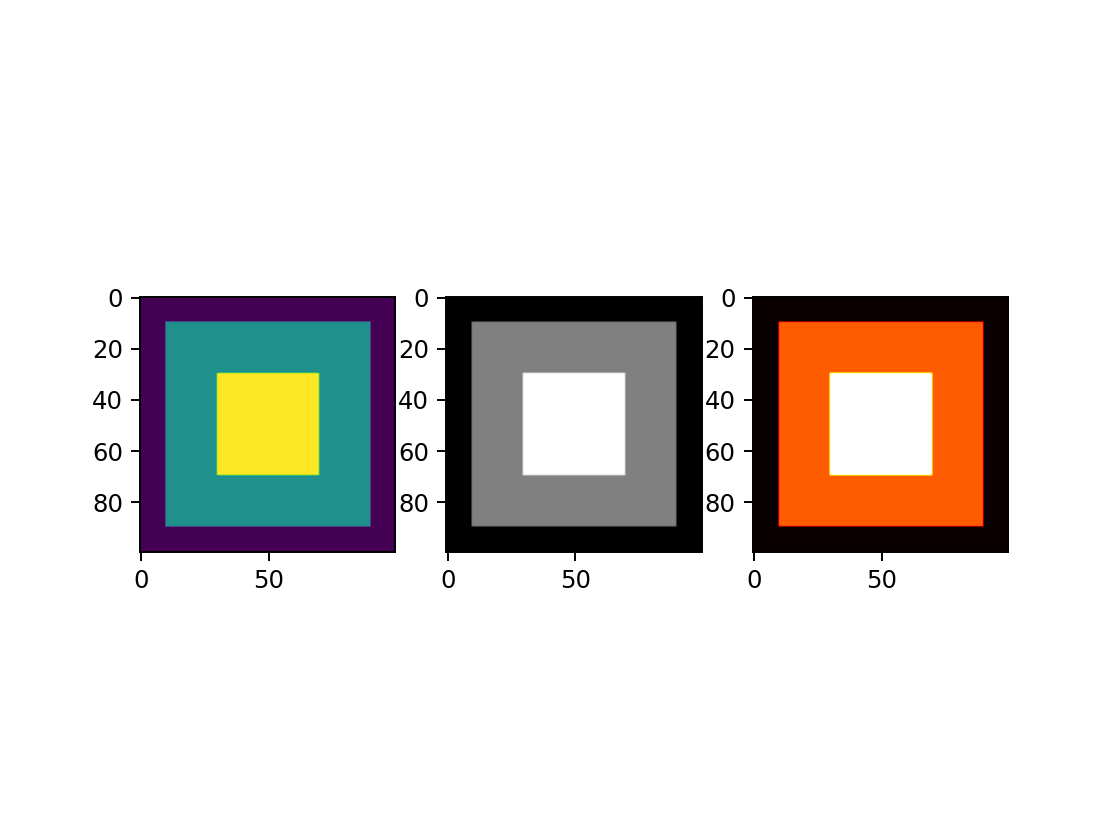

In [11]:
#create a matrix of zeros
img=np.zeros((100,100))

#draw two squares, one grey and other white
img[10:90,10:90] = 0.5
img[30:70,30:70] = 1    

fig1, ax = plt.subplots(1,3)
ax[0].imshow(img)

#change color palet
ax[1].imshow(img, cmap = "gray")
ax[2].imshow(img, cmap = "hot")



<IPython.core.display.Javascript object>


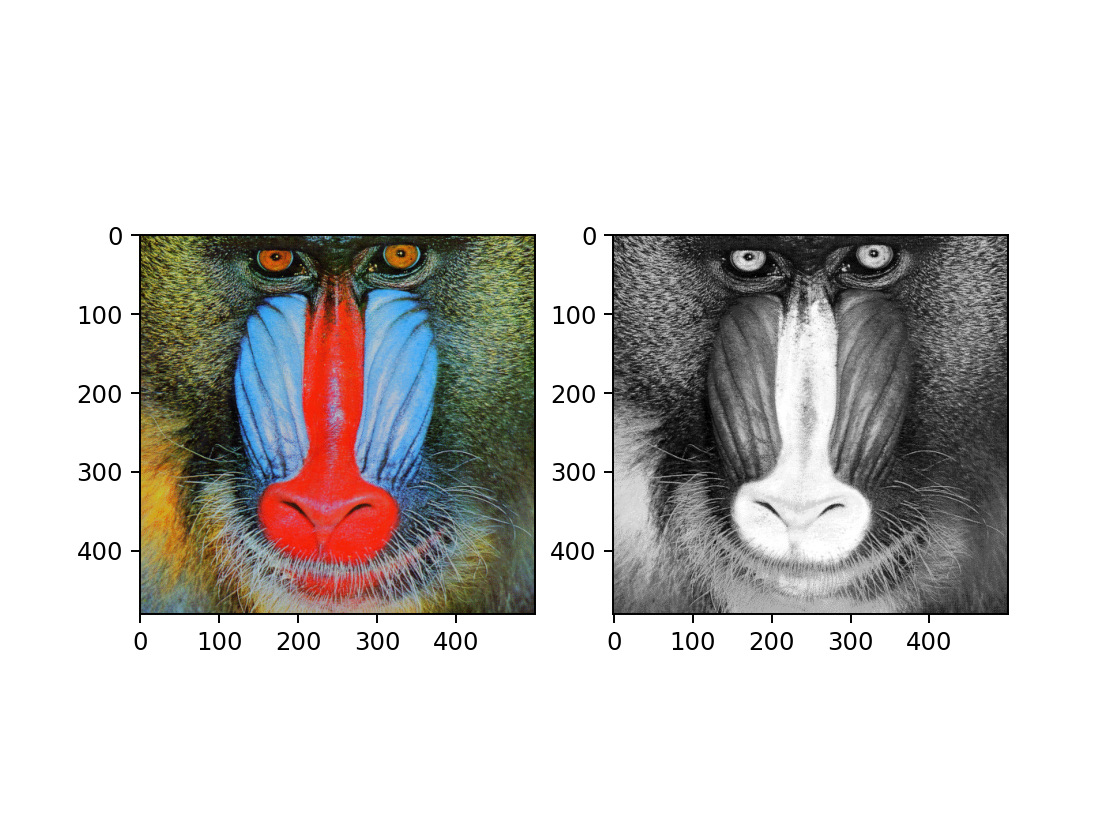

<IPython.core.display.Javascript object>


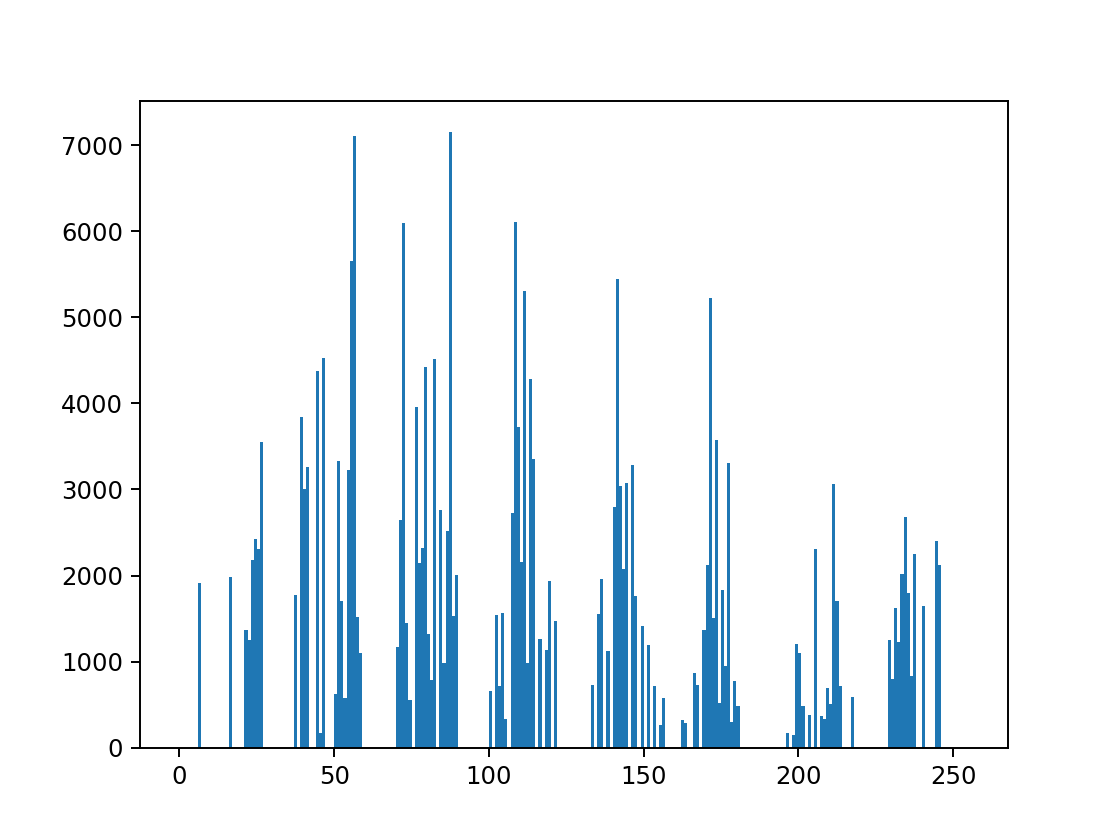

(array([   0.,    0.,    0.,    0.,    0.,    0., 1910.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1980.,    0.,
           0.,    0.,    0., 1366., 1253., 2176., 2425., 2303., 3553.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1776.,    0., 3848., 3000., 3264.,    0.,    0., 4382.,
         173., 4527.,    0.,    0.,    0.,  628., 3328., 1703.,  576.,
        3232., 5651., 7109., 1518., 1097.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1164., 2646.,
        6101., 1448.,  558.,    0., 3954., 2141., 2324., 4422., 1321.,
         785., 4519.,    0., 2760.,  988., 2518., 7160., 1526., 2009.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  659.,    0., 1542.,  720., 1567.,  327.,    0., 2726.,
        6108., 3726., 2163., 5311.,  980., 4284., 3356.,    0., 1267.,
           0., 1133., 1936.,    0., 1466.,    0.,    0.,    0.,    0.,
      

In [12]:
from PIL import Image

#open an jpg test image
img = np.asarray(Image.open('baboon.bmp'))

fig1, ax = plt.subplots(1,2)
ax[0].imshow(img)
lum_img = img[:, :, 0]
ax[1].imshow(lum_img, cmap = "gray")

#plot histogram
plt.figure()
plt.hist(lum_img.ravel(), bins=range(256))


<IPython.core.display.Javascript object>


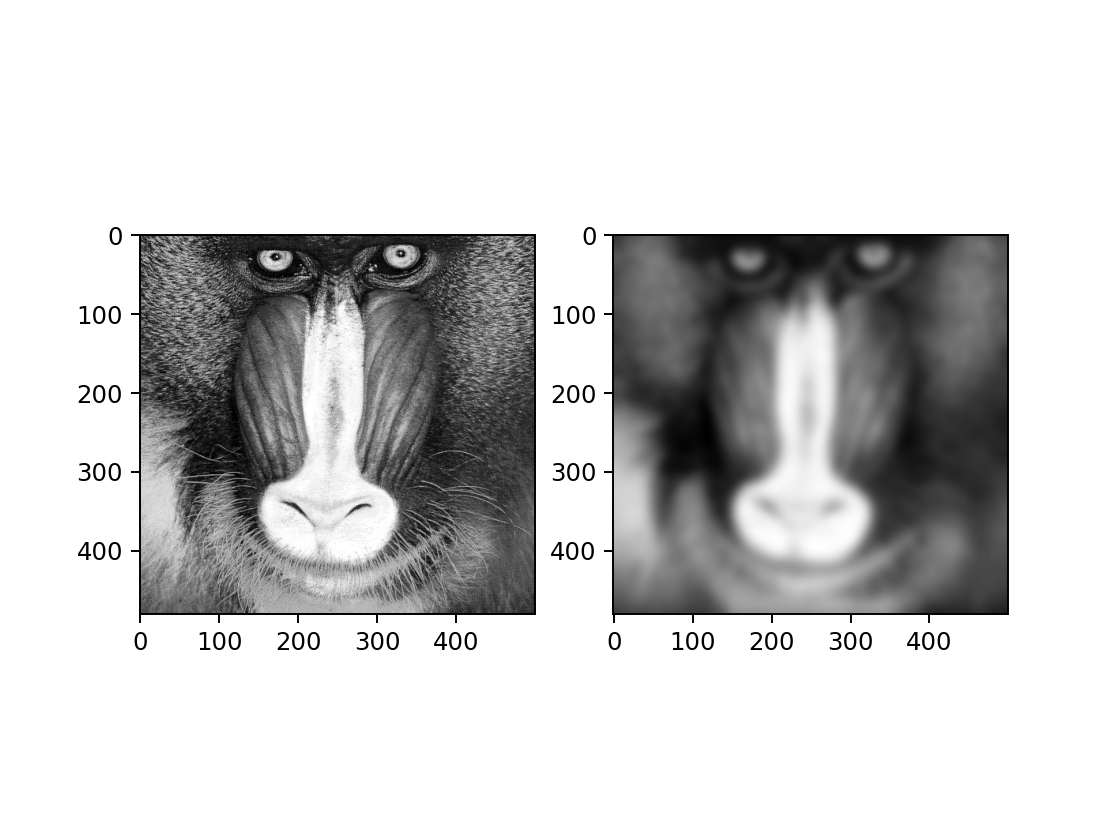

In [13]:
#apply a gaussian smooth filter to the  image
from scipy.ndimage.filters import gaussian_filter

sigma = 7
lum_filter_gaus=gaussian_filter(lum_img, sigma)

fig1, ax = plt.subplots(1,2)
ax[0].imshow(lum_img,  cmap = "gray")
ax[1].imshow(lum_filter_gaus,  cmap = "gray")